### Lets try to implement the gaussian type STO-3G basis set. It is the most simple and hence should be relatively easier to implement 
- The choice of basis (and its size) is quite important especially for the two electron integrals. 
- The number of two electron integrals increases as N$^4$ where N is the basis set size. 
- The HF-limit can only be achieved with a complete basis (infinite basis set size). However, that is not possible even using the high-power supercomputing facilities available today. The basic issues are the computation of integrals and the memory required to store the N$^4$ integrals.


Firstly, comparing the Hydrogenic 1s, Slater 1s and and STO-3G 1s orbital to see the difference

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def slater_1s(r, epsilon):
    return (epsilon**3/np.pi)*np.exp(-1*epsilon*r)
def hydrogen_1s(r):
    a0 = 0.529
    return (1/np.pi)*((1/a0)**(3/2))*np.exp(-1*r/a0)
def gaussian(r, alpha):
    return ((2*alpha/np.pi)**(3/4))*np.exp(-1*alpha*r**2)
def gaussian_1s(r):
    c1=0.444635
    c2=0.535328
    c3=0.154329
    return c1*gaussian(r, 0.109)+c2*gaussian(r, 0.405)+c3*gaussian(r, 2.227)
    


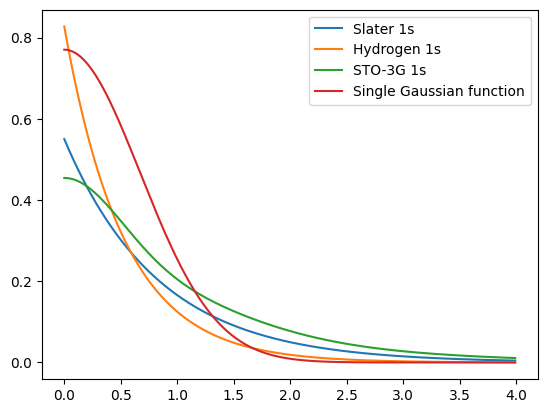

In [17]:
r = np.arange(0,4,0.01)
fig = plt.figure()
plt.plot(r ,slater_1s(r, 1.2), label='Slater 1s')
plt.plot(r, hydrogen_1s(r), label='Hydrogen 1s')
plt.plot(r, gaussian_1s(r), label='STO-3G 1s')
plt.plot(r, gaussian(r, 1.109), label='Single Gaussian function')
# plt.xlim((0,0.6))
plt.legend()
plt.show()


In [11]:
import sympy as sp

# Define symbols
x, y, z, alpha, hbar, m = sp.symbols('x y z alpha hbar m', real=True, positive=True)
A = sp.symbols('A', real=True)  # Amplitude, if normalization is required

# Define the Gaussian wavefunction
r_squared = x**2 + y**2 + z**2
psi = A * sp.exp(-alpha * r_squared)

# Compute the Laplacian of the wavefunction
laplacian_psi = sp.diff(psi, x, 2) + sp.diff(psi, y, 2) + sp.diff(psi, z, 2)

# Define the kinetic energy operator
kinetic_energy_operator = -(hbar**2 / (2 * m)) * laplacian_psi

# Compute the kinetic energy integral
integrand = sp.conjugate(psi) * kinetic_energy_operator
kinetic_energy_integral = sp.integrate(integrand, (x, 0, sp.oo), (y, 0, sp.oo), (z, 0, sp.oo))

# Simplify the result
kinetic_energy_integral_simplified = sp.simplify(kinetic_energy_integral)
print(kinetic_energy_integral_simplified.evalf(subs={hbar:1, alpha:1, m:1, A:1}))

# Print the result
print("Kinetic Energy Integral:")
print(kinetic_energy_integral_simplified)


0.369131483102869
Kinetic Energy Integral:
3*sqrt(2)*pi**(3/2)*A**2*hbar**2/(64*sqrt(alpha)*m)


In [13]:
def gaussian(x,y,z, alpha, A):
    x, y, z, alpha, hbar, m = sp.symbols('x y z alpha hbar m', real=True, positive=True)
    A = sp.symbols('A', real=True)  # Amplitude, if normalization is required

# Define the Gaussian wavefunction
    r_squared = x**2 + y**2 + z**2
    psi = ((2*A/sp.pi)**(3/4)) * sp.exp(-alpha * r_squared)
    return psi
x = np.linspace(0,10,1000)
y = np.linspace(0,10,1000)
z = np.linspace(0,10,1000)
dx = x[1]-x[0]
dy = y[1]-y[0]
dz = z[1]-z[0]

dydx = np.gradient(gaussian, dx, dy, dz)

TypeError: invalid number of arguments